## Homework

In [311]:
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1OKFSv2GpuUFDphO0r8LdM7bl6MAWwBfX' -O data.csv

"wget" ­Ґ пў«пҐвбп ў­гваҐ­­Ґ© Ё«Ё ў­Ґи­Ґ©
Є®¬ ­¤®©, ЁбЇ®«­пҐ¬®© Їа®Ја ¬¬®© Ё«Ё Ї ЄҐв­л¬ д ©«®¬.
"id" ­Ґ пў«пҐвбп ў­гваҐ­­Ґ© Ё«Ё ў­Ґи­Ґ©
Є®¬ ­¤®©, ЁбЇ®«­пҐ¬®© Їа®Ја ¬¬®© Ё«Ё Ї ЄҐв­л¬ д ©«®¬.


В этой домашней работе вы будете предсказывать стоимость домов по их характеристикам.

Метрика качества: `RMSE`

Оценивание:
* Baseline - 2 балла
* Feature Engineering - 2 балла
* Model Selection - 3 балла
* Ensemble v.1 - 3 балла
* (*) Ensemble v.2 - дополнительно, 2 балла

### Описание датасета

Короткое описание данных:
```
price: sale price (this is the target variable)
id: transaction id
timestamp: date of transaction
full_sq: total area in square meters, including loggias, balconies and other non-residential areas
life_sq: living area in square meters, excluding loggias, balconies and other non-residential areas
floor: for apartments, floor of the building
max_floor: number of floors in the building
material: wall material
build_year: year built
num_room: number of living rooms
kitch_sq: kitchen area
state: apartment condition
product_type: owner-occupier purchase or investment
sub_area: name of the district

The dataset also includes a collection of features about each property's surrounding neighbourhood, and some features that are constant across each sub area (known as a Raion). Most of the feature names are self explanatory, with the following notes. See below for a complete list.

full_all: subarea population
male_f, female_f: subarea population by gender
young_*: population younger than working age
work_*: working-age population
ekder_*: retirement-age population
n_m_{all|male|female}: population between n and m years old
build_count_*: buildings in the subarea by construction type or year
x_count_500: the number of x within 500m of the property
x_part_500: the share of x within 500m of the property
_sqm_: square meters
cafe_count_d_price_p: number of cafes within d meters of the property that have an average bill under p RUB
trc_: shopping malls
prom_: industrial zones
green_: green zones
metro_: subway
_avto_: distances by car
mkad_: Moscow Circle Auto Road
ttk_: Third Transport Ring
sadovoe_: Garden Ring
bulvar_ring_: Boulevard Ring
kremlin_: City center
zd_vokzaly_: Train station
oil_chemistry_: Dirty industry
ts_: Power plant
```

### Setup

In [223]:
import numpy as np
import warnings
import pandas as pd
% matplotlib inline
from matplotlib import pyplot as plt

warnings.filterwarnings("ignore")

UsageError: Line magic function `%` not found.


Там ника не получилось сделать через !wget, поэтому скачивал dataset с диска

In [224]:
df = pd.read_csv("data.csv", parse_dates=["timestamp"])

In [225]:
df.head()

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price
0,0,2014-12-26,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,36,7,2,15,33,1,12,75,10,15318960
1,1,2012-10-04,64,64.0,16.0,NaN,NaN,NaN,NaN,NaN,...,2,2,0,0,13,1,0,6,1,6080000
2,2,2014-02-05,83,44.0,9.0,17.0,1.0,1985.0,3.0,10.0,...,13,6,1,8,18,0,1,52,0,17000000
3,3,2012-07-26,71,49.0,2.0,NaN,NaN,NaN,NaN,NaN,...,0,0,0,1,3,0,2,8,2,990000
4,4,2014-10-29,60,42.0,9.0,9.0,1.0,1970.0,3.0,6.0,...,3,1,0,5,8,0,1,34,5,7900000


In [226]:
df.shape

(20000, 292)

In [227]:
df.describe()

,id,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price
count,20000.000000,20000.000000,15897.000000,19887.000000,13697.000000,13697.000000,1.109500e+04,13697.00000,13697.000000,11093.000000,...,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,2.000000e+04
mean,9999.500000,54.259950,34.032333,7.644441,12.603928,1.838505,3.687418e+03,1.91071,6.454917,2.106193,...,32.071450,10.769500,1.766000,15.019450,30.244100,0.443100,8.626950,53.054950,6.005700,7.118799e+06
std,5773.647028,43.854961,20.334584,5.296399,6.697509,1.490693,1.903508e+05,0.84761,30.356250,0.894694,...,73.363767,28.341276,5.410869,29.030694,47.297621,0.609492,20.555892,46.186733,4.879494,4.660903e+06
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000e+00,0.00000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.600000e+05
25%,4999.750000,38.000000,20.000000,3.000000,9.000000,1.000000,1.967000e+03,1.00000,1.000000,1.000000,...,2.000000,1.000000,0.000000,2.000000,9.000000,0.000000,0.000000,11.000000,1.000000,4.750000e+06
50%,9999.500000,49.000000,30.000000,6.000000,12.000000,1.000000,1.979000e+03,2.00000,6.000000,2.000000,...,9.000000,2.000000,0.000000,7.000000,16.000000,0.000000,2.000000,48.000000,5.000000,6.293700e+06
75%,14999.250000,63.000000,43.000000,11.000000,17.000000,2.000000,2.005000e+03,2.00000,9.000000,3.000000,...,22.000000,5.000000,1.000000,12.000000,28.000000,1.000000,7.000000,76.000000,10.000000,8.265853e+06
max,19999.000000,5326.000000,637.000000,44.000000,99.000000,6.000000,2.005201e+07,19.00000,2014.000000,33.000000,...,377.000000,147.000000,29.000000,151.000000,250.000000,2.000000,106.000000,218.000000,21.000000,9.106610e+07


In [228]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Columns: 292 entries, id to price
dtypes: datetime64[ns](1), float64(119), int64(157), object(15)
memory usage: 44.6+ MB


In [229]:
df.columns

Index(['id', 'timestamp', 'full_sq', 'life_sq', 'floor', 'max_floor',
       'material', 'build_year', 'num_room', 'kitch_sq',
       ...
       'cafe_count_5000_price_2500', 'cafe_count_5000_price_4000',
       'cafe_count_5000_price_high', 'big_church_count_5000',
       'church_count_5000', 'mosque_count_5000', 'leisure_count_5000',
       'sport_count_5000', 'market_count_5000', 'price'],
      dtype='object', length=292)

Разделите имеющиеся у вас данные на обучающую и тестовую выборки. В качестве обучающей выборки возьмите первые 80% данных, последние 20% - тестовая выборка.

In [230]:
df.isnull().sum(axis=0)

id                       0
timestamp                0
full_sq                  0
life_sq               4103
floor                  113
                      ... 
mosque_count_5000        0
leisure_count_5000       0
sport_count_5000         0
market_count_5000        0
price                    0
Length: 292, dtype: int64

Возможно в ваших моделях вам придется указывать, какие колонки являются категориальными (например, в бустингах). Для упрощения предлагается разделить колонки по следующему принципу:

In [231]:
drop_columns = [
    'id',  # May leak information
    'timestamp',  # May leak information
]
cat_columns = [
    'product_type',  #
    'material',  # Material of the wall
    'state',  # Satisfaction level
    'sub_area',  # District name
    'culture_objects_top_25',  #
    'thermal_power_plant_raion',  #
    'incineration_raion',  #
    'oil_chemistry_raion',  #
    'radiation_raion',  #
    'railroad_terminal_raion',  #
    'big_market_raion',  #
    'nuclear_reactor_raion',  #
    'detention_facility_raion',  #
    'ID_metro',  #
    'ID_railroad_station_walk',  #
    'ID_railroad_station_avto',  #
    'water_1line',  #
    'ID_big_road1',  #
    'big_road1_1line',  #
    'ID_big_road2',  #
    'railroad_1line',  #
    'ID_railroad_terminal',  #
    'ID_bus_terminal',  #
    'ecology',  #
]
num_columns = list(set(df.columns).difference(set(cat_columns + drop_columns)))

Заполним пропуски (средним/самым частым)

In [232]:
from sklearn.impute import SimpleImputer

df[num_columns] = SimpleImputer(strategy='mean').fit_transform(df[num_columns])
df[cat_columns] = SimpleImputer(strategy='most_frequent').fit_transform(df[cat_columns])
df.isnull().sum()

id                    0
timestamp             0
full_sq               0
life_sq               0
floor                 0
                     ..
mosque_count_5000     0
leisure_count_5000    0
sport_count_5000      0
market_count_5000     0
price                 0
Length: 292, dtype: int64

применим one-hot кодирование

In [233]:
df = pd.get_dummies(df)
df_old_version = df.copy()

In [234]:
df = df.drop(columns=drop_columns)

In [235]:
df

,full_sq,life_sq,floor,max_floor,build_year,num_room,kitch_sq,area_m,raion_popul,green_zone_part,...,ID_bus_terminal_10,ID_bus_terminal_11,ID_bus_terminal_12,ID_bus_terminal_13,ID_bus_terminal_14,ecology_excellent,ecology_good,ecology_no data,ecology_poor,ecology_satisfactory
0,1.0,1.000000,1.0,1.000000,1.000000,1.00000,1.000000,5.293465e+06,77878.0,0.023464,...,0,0,0,0,0,0,0,0,1,0
1,64.0,64.000000,16.0,12.603928,3687.417575,1.91071,6.454917,6.677245e+07,9553.0,0.336177,...,0,0,0,0,0,0,0,1,0,0
2,83.0,44.000000,9.0,17.000000,1985.000000,3.00000,10.000000,1.216448e+07,78507.0,0.297166,...,0,0,0,0,0,0,1,0,0,0
3,71.0,49.000000,2.0,12.603928,3687.417575,1.91071,6.454917,4.708040e+06,38075.0,0.271702,...,0,0,0,0,0,0,0,1,0,0
4,60.0,42.000000,9.0,9.000000,1970.000000,3.00000,6.000000,1.428699e+07,157010.0,0.389354,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,45.0,27.000000,2.0,9.000000,1978.000000,2.00000,5.000000,2.481385e+07,174831.0,0.683844,...,0,0,0,0,0,0,1,0,0,0
19996,38.0,34.032333,4.0,17.000000,3687.417575,2.00000,1.000000,6.677245e+07,9553.0,0.336177,...,0,0,0,0,0,0,0,1,0,0
19997,35.0,14.000000,9.0,22.000000,2001.000000,1.00000,10.000000,1.004686e+07,76156.0,0.071056,...,0,0,0,0,0,1,0,0,0,0
19998,51.0,30.000000,8.0,17.000000,2011.000000,2.00000,9.000000,4.036700e+07,21819.0,0.492840,...,0,0,0,0,0,0,0,1,0,0


In [236]:
from sklearn.model_selection import train_test_split

X = df.drop(columns='price')
Y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

### Baseline (2 балла)

В качестве Baseline обучите `DecisionTreeRegressor` из `sklearn`.

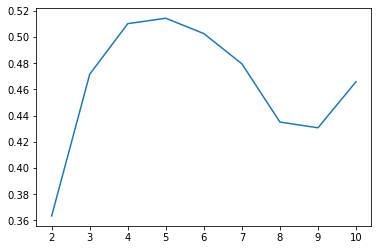

In [237]:
from sklearn.tree import DecisionTreeRegressor

depths = np.arange(2, 11)
acc = []
for depth in depths:
    clf = DecisionTreeRegressor(max_depth=depth, random_state=42)
    clf.fit(X_train, y_train)
    acc.append(clf.score(X_test, y_test))
plt.plot(depths, acc)
plt.show()

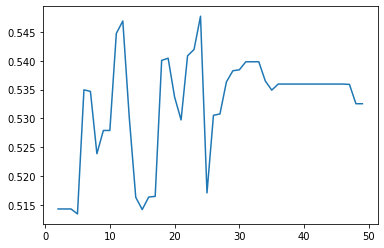

In [238]:
samples = np.arange(2, 50)
acc = []
for sample in samples:
    clf = DecisionTreeRegressor(max_depth=5, min_samples_leaf=sample, random_state=42)
    clf.fit(X_train, y_train)
    acc.append(clf.score(X_test, y_test))
plt.plot(samples, acc)
plt.show()

min_samples_leaf особо  не меняет, а max_depth = 5 будет давать весомую разницу

Проверьте качество на отложенной выборке.

In [239]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

сlf = DecisionTreeRegressor(max_depth=5, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(f'Accuracy: {clf.score(X_test, y_test)}')
print(f'MSE: {mean_squared_error(y_test, y_pred, squared=False)}')
print(f'Accuracy on CV: {np.mean(cross_val_score(clf, X_test, y_test, cv=5))}')

Accuracy: 0.5325373040109862
MSE: 3051066.0082318154
Accuracy on CV: 0.5045264807738297


### Feature Engineering (2 балла)

Часто улучшить модель можно с помощью аккуратного Feature Engineering.

Добавим в модель дополнительные признаки:
* "Как часто в этот год и этот месяц появлились объявления"
* "Как часто в этот год и эту неделю появлялись объявления"

In [287]:
df = df_old_version
month_year = (df.timestamp.dt.month + df.timestamp.dt.year * 100)
month_year_cnt_map = month_year.value_counts().to_dict()
df["month_year_cnt"] = month_year.map(month_year_cnt_map)

week_year = (df.timestamp.dt.weekofyear + df.timestamp.dt.year * 100)
week_year_cnt_map = week_year.value_counts().to_dict()
df["week_year_cnt"] = week_year.map(week_year_cnt_map)

Добавьте следюущие дополнительные признаки:
* Месяц (из колонки `timestamp`)
* День недели (из колонки `timestamp`)
* Отношение "этаж / максимальный этаж в здании" (колонки `floor` и `max_floor`)
* Отношение "площадь кухни / площадь квартиры" (колонки `kitchen_sq` и `full_sq`)

По желанию можно добавить и другие признаки.

In [288]:
df['month'] = df.timestamp.dt.month
df['day'] = df.timestamp.dt.weekday
df['floor/max_floor'] = df['floor'] / df['max_floor']
df['kitchen_sq/full_sq'] = df['kitch_sq'] / df['full_sq']

In [289]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)

In [290]:
X = df.drop(columns=['price', 'id', 'timestamp'])
Y = df['price']

Разделите выборку на обучающую и тестовую еще раз (потому что дополнительные признаки созданы для исходной выборки).

In [291]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [292]:
drop_columns = [
    'id',  # May leak information
    'timestamp',
    'price'  # May leak information
]
cat_columns = [
    'product_type',  #
    'material',  # Material of the wall
    'state',  # Satisfaction level
    'sub_area',  # District name
    'culture_objects_top_25',  #
    'thermal_power_plant_raion',  #
    'incineration_raion',  #
    'oil_chemistry_raion',  #
    'radiation_raion',  #
    'railroad_terminal_raion',  #
    'big_market_raion',  #
    'nuclear_reactor_raion',  #
    'detention_facility_raion',  #
    'ID_metro',  #
    'ID_railroad_station_walk',  #
    'ID_railroad_station_avto',  #
    'water_1line',  #
    'ID_big_road1',  #
    'big_road1_1line',  #
    'ID_big_road2',  #
    'railroad_1line',  #
    'ID_railroad_terminal',  #
    'ID_bus_terminal',  #
    'ecology',  #
]
num_columns = list(set(df.columns).difference(set(cat_columns + drop_columns)))

In [293]:
X_train[num_columns] = SimpleImputer(strategy='mean').fit_transform(X_train[num_columns])
X_test[num_columns] = SimpleImputer(strategy='mean').fit_transform(X_test[num_columns])

In [297]:
сlf = DecisionTreeRegressor(max_depth=5, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(f'Accuracy: {clf.score(X_test, y_test)}')
print(f'RMSE: {mean_squared_error(y_test, y_pred, squared=False)}')
print(f'Accuracy on CV: {np.mean(cross_val_score(clf, X_test, y_test, cv=5))}')

Accuracy: 0.5325373040109862
RMSE: 3051066.0082318154
Accuracy on CV: 0.5045264807738297


### Model Selection (3 балла)

Посмотрите, какого качества можно добиться если использовать разные модели:
* `DecisionTreeRegressor` из `sklearn`
* `RandomForestRegressor` из `sklearn`
* `CatBoostRegressor`

Также вы можете попробовать линейные модели, другие бустинги (`LigthGBM` и `XGBoost`).

Почти все библиотеки поддерживают удобный способ подбора гиперпараметров: посмотрите как это делать в [sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) или в [catboost](https://catboost.ai/docs/concepts/python-reference_catboostregressor_grid_search.html).

Проверяйте качество каждой модели на тестовой выборке и выберите наилучшую.

In [296]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from catboost import CatBoostRegressor

In [304]:
clf = DecisionTreeRegressor(max_depth=5, random_state=42).fit(X_train, y_train)
print(f'Tree RMSE: {mean_squared_error(clf.predict(X_test), y_test, squared=False)}')

Tree RMSE: 3110006.438354547


In [305]:
forest = RandomForestRegressor(random_state=42).fit(X_train, y_train)
print(f'Forest RMSE: {mean_squared_error(forest.predict(X_test), y_test, squared=False)}')

Forest RMSE: 2623114.0328459


In [306]:
cat = CatBoostRegressor(loss_function='RMSE', random_state=42).fit(X_train, y_train)
print(f'CatBoost RMSE: {mean_squared_error(cat.predict(X_test), y_test, squared=False)}')

Learning rate set to 0.06345
0:	learn: 4552070.8636717	total: 35ms	remaining: 35s
1:	learn: 4408030.2040145	total: 63.8ms	remaining: 31.9s
2:	learn: 4277069.0685786	total: 96.2ms	remaining: 32s
3:	learn: 4161266.4430885	total: 125ms	remaining: 31.1s
4:	learn: 4049773.1323086	total: 153ms	remaining: 30.5s
5:	learn: 3945351.4448102	total: 184ms	remaining: 30.5s
6:	learn: 3849765.2969509	total: 216ms	remaining: 30.6s
7:	learn: 3758275.4015378	total: 248ms	remaining: 30.8s
8:	learn: 3675243.5736858	total: 282ms	remaining: 31s
9:	learn: 3599633.5551710	total: 313ms	remaining: 31s
10:	learn: 3532631.3628950	total: 341ms	remaining: 30.7s
11:	learn: 3464252.6179827	total: 373ms	remaining: 30.7s
12:	learn: 3402021.7558774	total: 406ms	remaining: 30.9s
13:	learn: 3348788.2436996	total: 439ms	remaining: 30.9s
14:	learn: 3299766.8206957	total: 468ms	remaining: 30.7s
15:	learn: 3252341.6928410	total: 497ms	remaining: 30.6s
16:	learn: 3206077.8166906	total: 530ms	remaining: 30.6s
17:	learn: 3163772.

### Ensemble v.1 (3 балла)

Ансамбли иногда оказываются лучше чем одна большая модель.

В колонке `product_type` содержится информация о том, каким является объявление: `Investment` (продажа квартиры как инвестиции) или `OwnerOccupier` (продажа квартиры для жилья). Логично предположить, что если сделать по модели на каждый из этих типов, то качество будет выше.

Обучите свои лучшие модели на отдельно на `Investment` и `OwnerOccupier` (т.е. у вас будет `model_invest`, обученная на `(invest_train_X, invest_train_Y)` и `model_owner`, обученная на `(owner_train_X, owner_train_Y)`) и проверьте качество на отложенной выборке (т.е. на исходном `test_split`).

In [309]:
X_train['price'] = y_train
invest_train= X_train[X_train['product_type_Investment'] == 1]
invest_train_Y =  invest_train['price']
invest_train_X = invest_train.drop(columns=['price'])
owner_train= X_train[X_train['product_type_Investment'] == 1]
owner_train_Y = owner_train['price']
owner_train_X = owner_train.drop(columns=['price'])

In [310]:
invest_boost = CatBoostRegressor(loss_function='RMSE', random_state=42).fit(invest_train_X, invest_train_Y)
owner_boost = CatBoostRegressor(loss_function='RMSE', random_state=42).fit(owner_train_X,owner_train_Y)
invest_pred = invest_boost.predict(X_test)
owner_pred = owner_boost.predict(X_test)
print(f'invest RMSE: {mean_squared_error(y_test,invest_pred,squared=False)}')
print(f'owner RMSE: {mean_squared_error(y_test,owner_pred,squared=False)}')

Learning rate set to 0.059133
0:	learn: 4787898.1444205	total: 40.5ms	remaining: 40.5s
1:	learn: 4659117.6896665	total: 126ms	remaining: 1m 2s
2:	learn: 4548423.8968088	total: 204ms	remaining: 1m 7s
3:	learn: 4437529.1042529	total: 233ms	remaining: 58s
4:	learn: 4326689.3746325	total: 263ms	remaining: 52.3s
5:	learn: 4232027.6233654	total: 292ms	remaining: 48.3s
6:	learn: 4141509.7041471	total: 317ms	remaining: 44.9s
7:	learn: 4060090.0010089	total: 346ms	remaining: 42.9s
8:	learn: 3982937.7662412	total: 370ms	remaining: 40.7s
9:	learn: 3906205.8802237	total: 393ms	remaining: 38.9s
10:	learn: 3841426.5097257	total: 417ms	remaining: 37.5s
11:	learn: 3783717.1610487	total: 444ms	remaining: 36.6s
12:	learn: 3724122.9404342	total: 474ms	remaining: 36s
13:	learn: 3672545.6579518	total: 507ms	remaining: 35.7s
14:	learn: 3624250.6650016	total: 544ms	remaining: 35.7s
15:	learn: 3574218.5469250	total: 582ms	remaining: 35.8s
16:	learn: 3528214.9692414	total: 622ms	remaining: 35.9s
17:	learn: 348

Ансамбли оказались хуже

### (*) Ensemble v.2 (дополнительно, 2 балла)

Попробуйте сделать для `Investment` более сложную модель: обучите `CatBoostRegressor` и `HuberRegressor` из `sklearn`, а затем сложите их предсказания с весами `w_1` и `w_2` (выберите веса сами; сумма весов равняется 1).